In [1]:
# TODO, show differences related to post-selecting for depth vs post-selectng for total gates added
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from transpile_benchy.metrics.gate_counts import DepthMetric, TotalMetric

In [2]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../circuits/medium_circuits.txt")

In [3]:
coupling_map = CouplingMap.from_heavy_hex(5)
transpilers = [
    QiskitLevel3(coupling_map),  # 20,4,20
    SabreMS(
        coupling_map,
        name="SABREMS-MinSwaps",
        cost_function="basic",
        fixed_aggression=1,
    ),
    SabreMS(
        coupling_map,
        name="SABREMS-MinDepth",
        fixed_aggression=1,
    ),
]

metrics = [DepthMetric(consolidate=False), TotalMetric(consolidate=False)]

In [4]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    num_runs=10,
)
benchmark.run()

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:   0%|          | 0/21 [00:00<?, ?it/s]

Loading ghz_state_n23 from QASMBench


Circuits from library:   5%|▍         | 1/21 [00:15<05:19, 15.97s/it]

Loading bv_n14 from QASMBench


Circuits from library:   5%|▍         | 1/21 [00:46<15:28, 46.44s/it]


KeyboardInterrupt: 

In [ ]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'monodromy_depth': {'average_change': -24.292452306947776,
  'best_circuit': 'qftentangled_n8',
  'worst_circuit': 'qaoa_n8'},
 'monodromy_total': {'average_change': -20.777486074636215,
  'best_circuit': 'qftentangled_n8',
  'worst_circuit': 'qaoa_n8'},
 'total_runtime': {'average_change': 11874.069370760893,
  'best_circuit': 'qft_n8',
  'worst_circuit': 'toffoli_n3'}}

In [ ]:
benchmark.summary_statistics(transpilers[1], transpilers[2])

{'monodromy_depth': {'average_change': -0.7375419533467216,
  'best_circuit': 'dj_n8',
  'worst_circuit': 'toffoli_n3'},
 'monodromy_total': {'average_change': -0.32349502865669416,
  'best_circuit': 'dj_n8',
  'worst_circuit': 'toffoli_n3'},
 'total_runtime': {'average_change': 0.7026635757019533,
  'best_circuit': 'toffoli_n3',
  'worst_circuit': 'qaoa_n8'}}

In [ ]:
benchmark.summary_statistics(transpilers[0], transpilers[2])

{'monodromy_depth': {'average_change': -24.972178493850535,
  'best_circuit': 'qftentangled_n8',
  'worst_circuit': 'qaoa_n8'},
 'monodromy_total': {'average_change': -21.06362501918285,
  'best_circuit': 'qftentangled_n8',
  'worst_circuit': 'qaoa_n8'},
 'total_runtime': {'average_change': 11659.833377354753,
  'best_circuit': 'qft_n8',
  'worst_circuit': 'toffoli_n3'}}

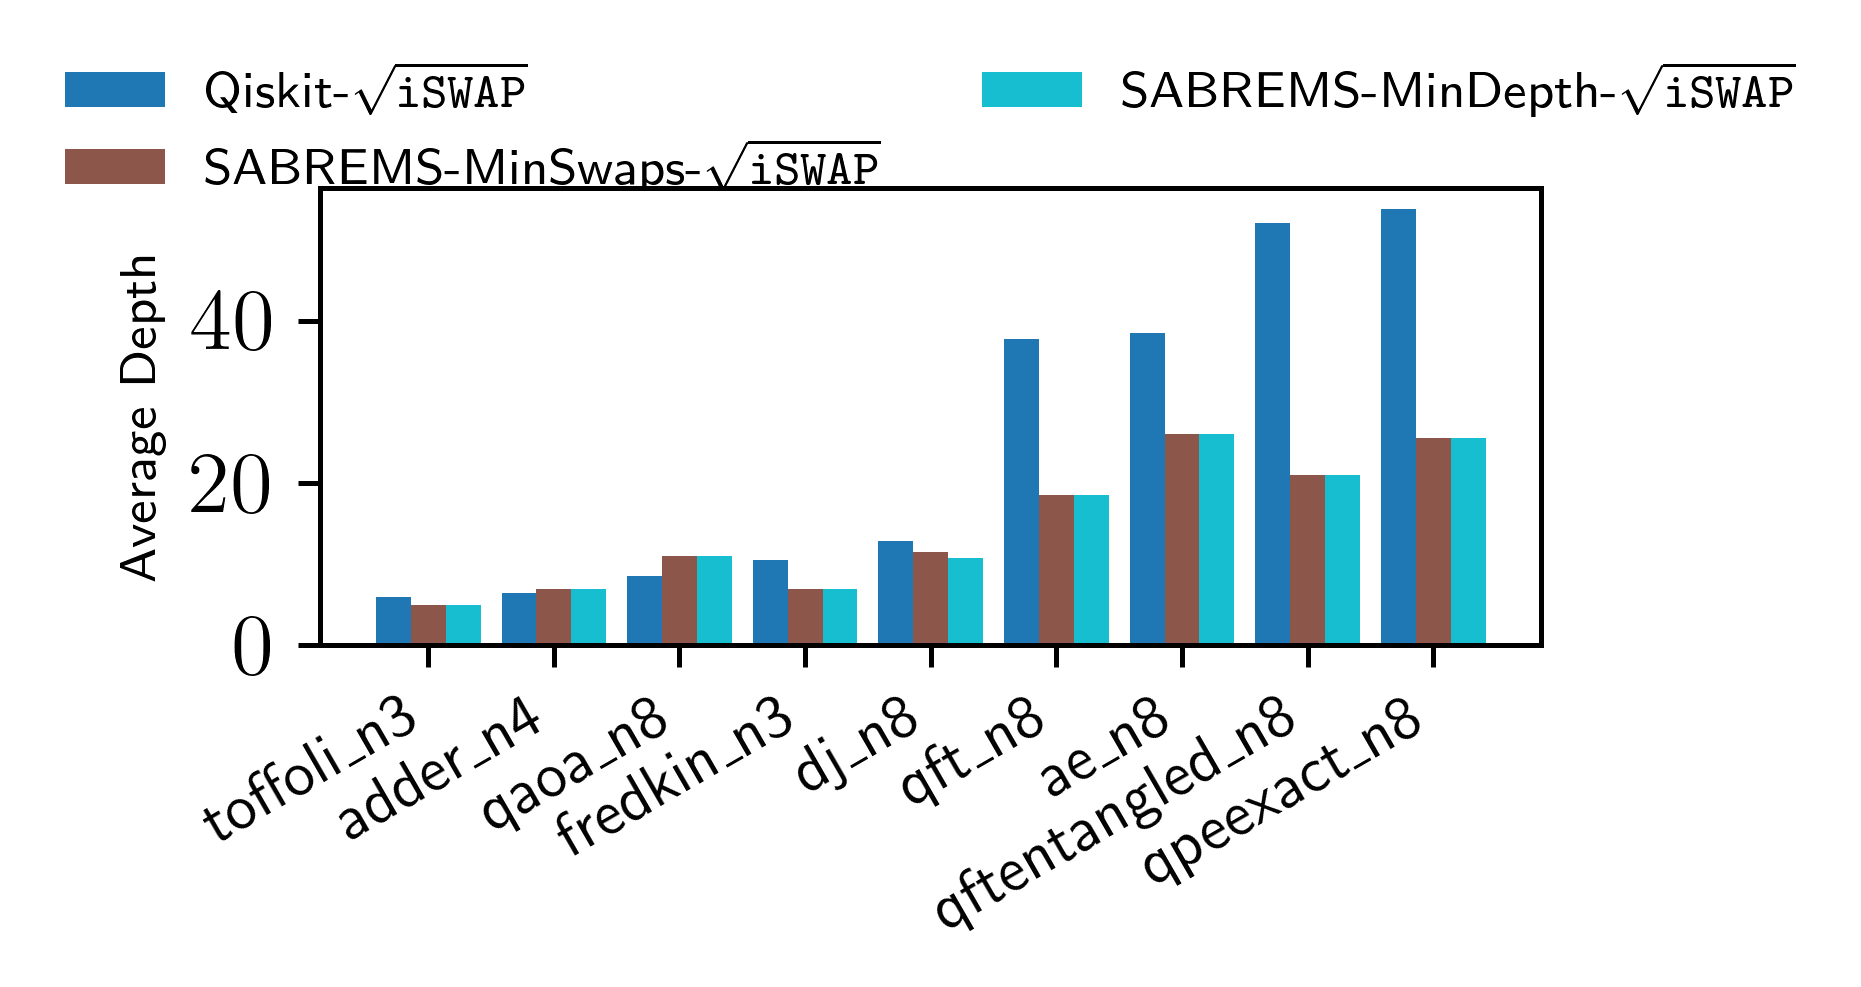

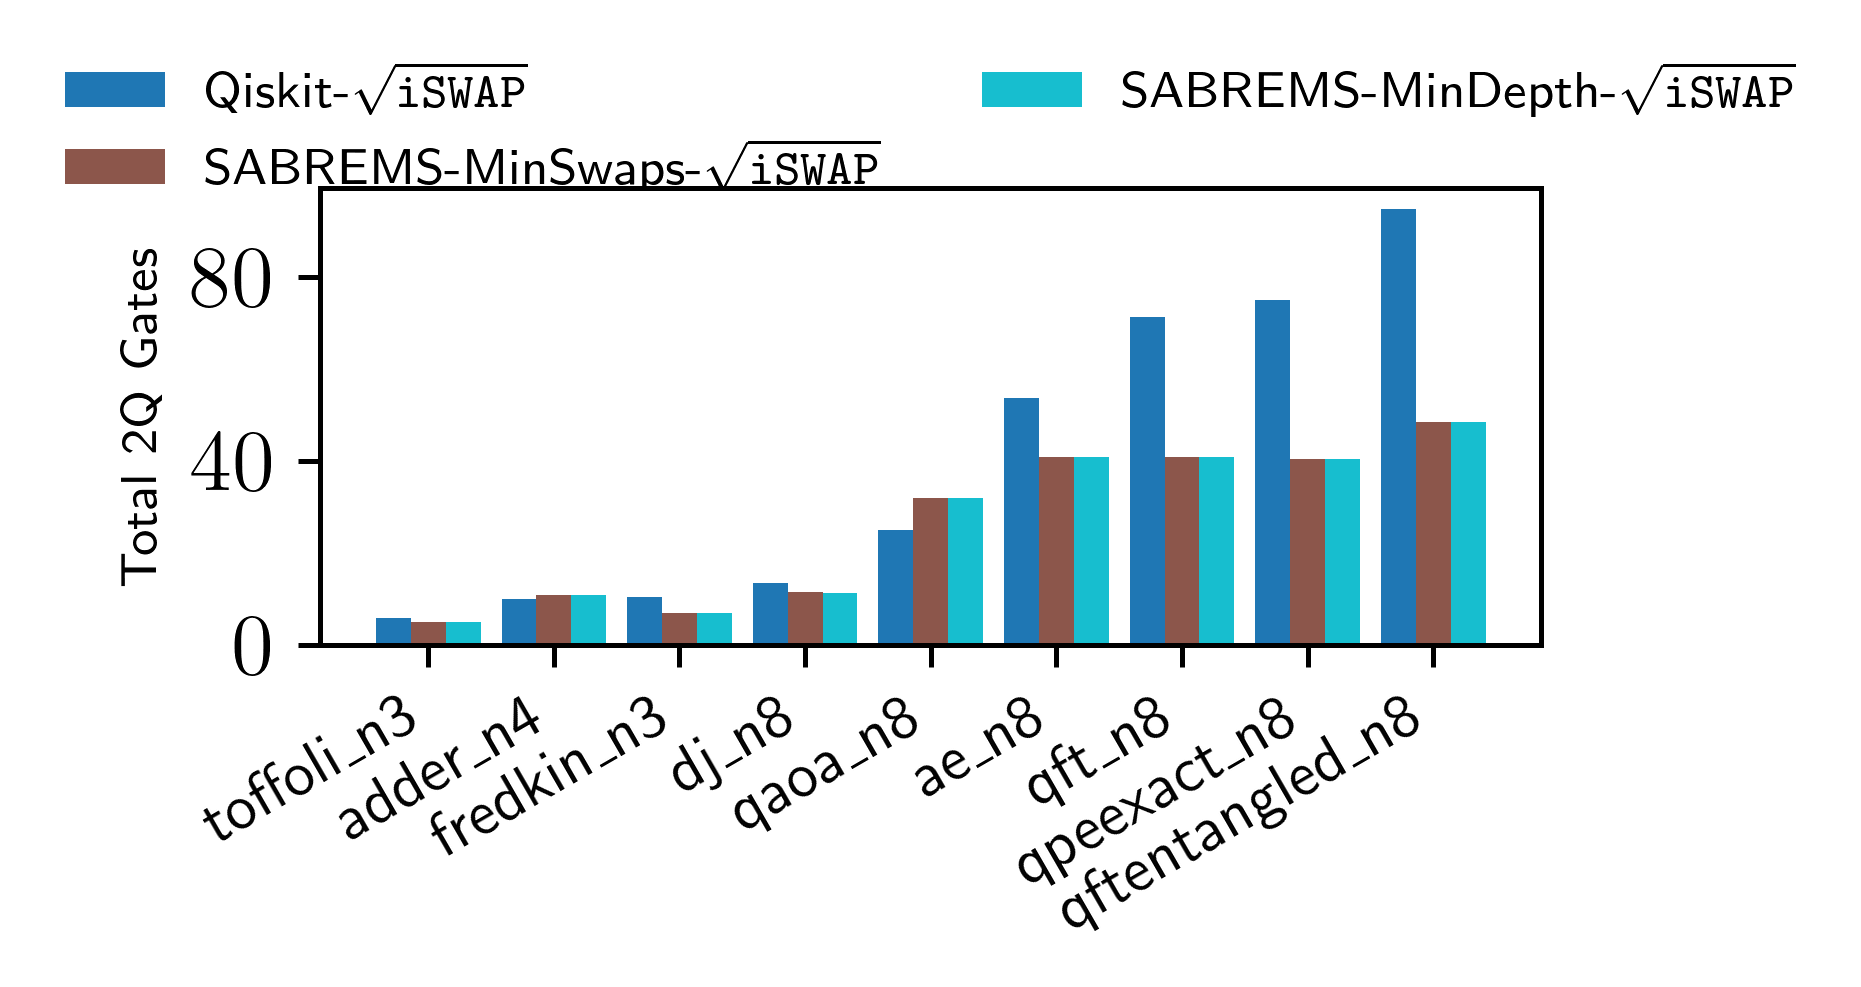

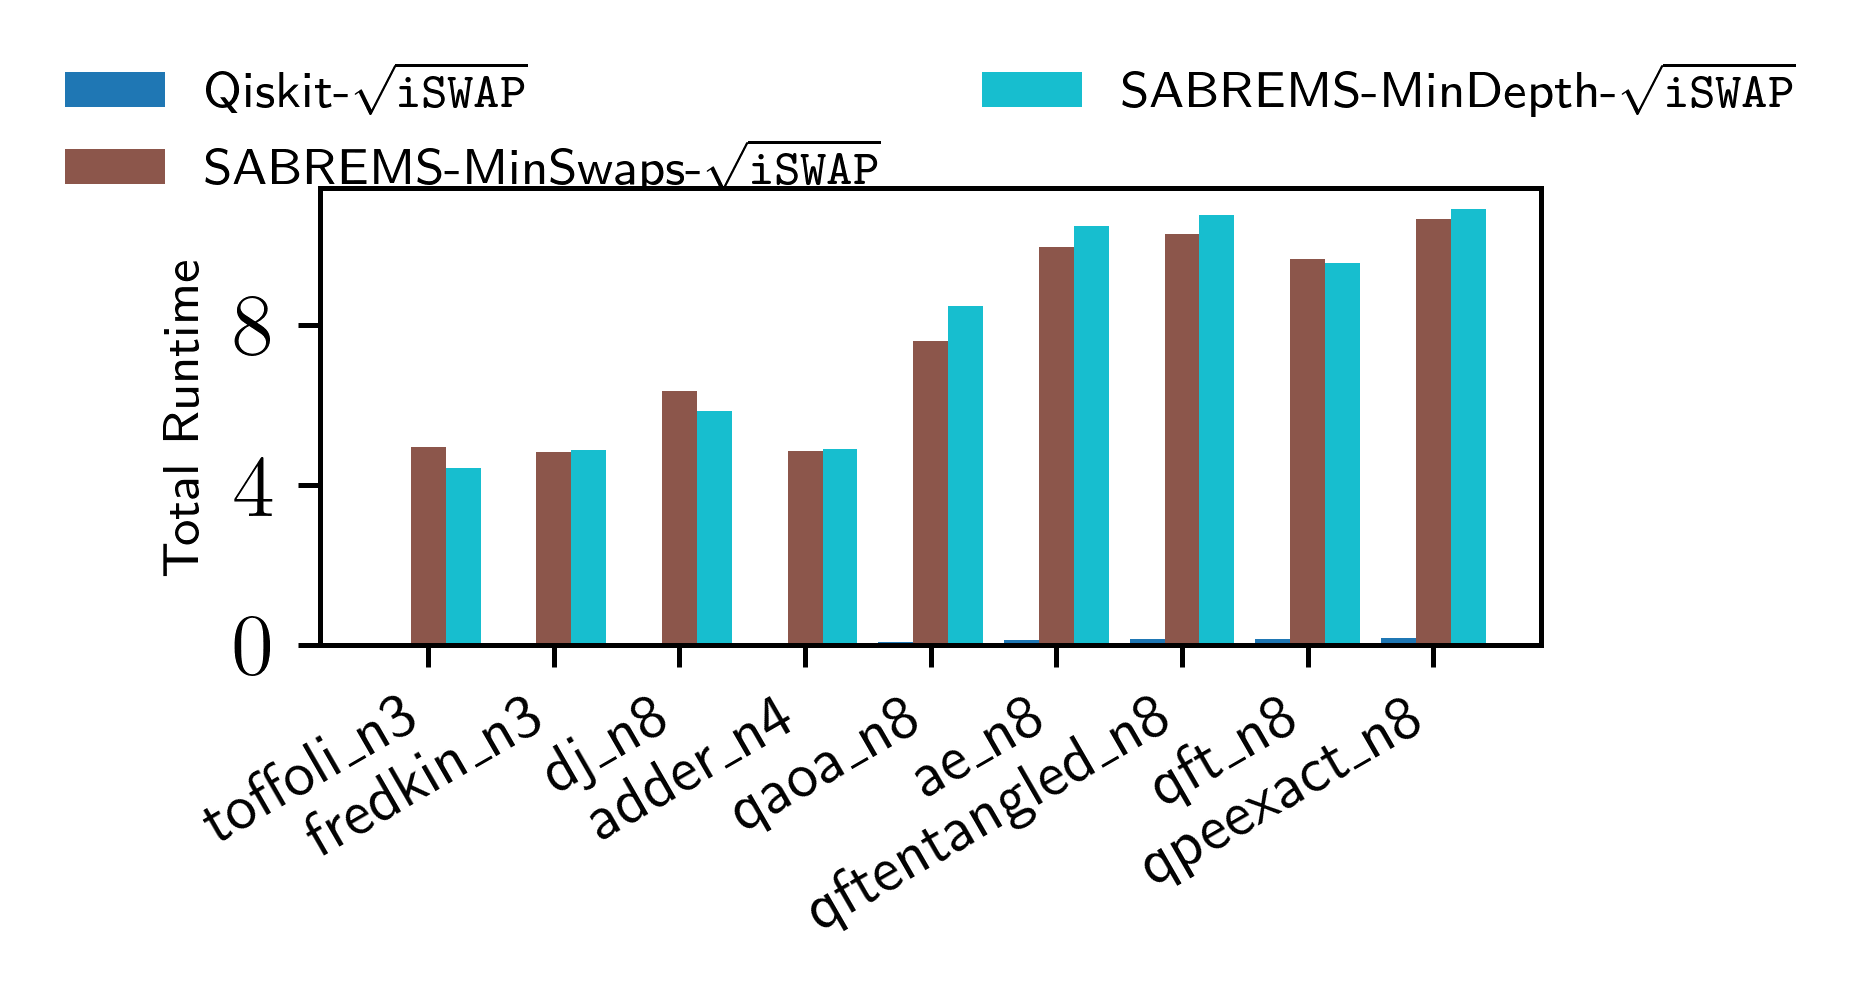

In [ ]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=0, legend_show=1, filename="post")

In [ ]:
print(benchmark)


Transpiler: Qiskit-$\sqrt{\texttt{iSWAP}}$

  Metric: monodromy_depth
  Circuit: adder_n4                                 Mean result: 6.500                          Trials: [6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5]
  Circuit: ae_n8                                    Mean result: 38.502                         Trials: [35.5, 40.5, 42.5, 38.0, 36.5, 42.5, 41.5, 35.5, 38.0, 35.5]
  Circuit: dj_n8                                    Mean result: 12.911                         Trials: [10.5, 13.0, 13.5, 13.5, 14.5, 10.0, 14.5, 13.5, 13.5, 13.5]
  Circuit: fredkin_n3                               Mean result: 10.500                         Trials: [10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5]
  Circuit: qaoa_n8                                  Mean result: 8.500                          Trials: [8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5]
  Circuit: qft_n8                                   Mean result: 37.795                         Trials: [37.5, 37.5, 37.5, 3